# Predicting Cancellations for Future Reservations

This notebooks makes use of the `generate_hotel_dfs` and `model_cancellations` functions found in `utils.py`.

In [1]:
from setup import generate_hotel_dfs
from model_cancellations import predict_cancellations, model_cancellations
import pandas as pd
import numpy as np

In [2]:
pd.options.display.max_rows = 60
pd.options.display.max_columns = 70

In [3]:
# h1_res, h1_dbd = generate_hotel_dfs("../data/H1.csv")
# h2_res, h2_dbd = generate_hotel_dfs("../data/H2.csv")

In [4]:
# h1_res.to_pickle("pickle/h1_res.pick")
# h1_dbd.to_pickle("pickle/h1_dbd.pick")
# h2_res.to_pickle("pickle/h2_res.pick")
# h2_dbd.to_pickle("pickle/h2_dbd.pick")

In [5]:
h1_res = pd.read_pickle("pickle/h1_res.pick")
h2_res = pd.read_pickle("pickle/h2_res.pick")
h1_dbd = pd.read_pickle("pickle/h1_dbd.pick")
h2_dbd = pd.read_pickle("pickle/h2_dbd.pick")

Training sample size: 38295
Testing sample Size: 1765




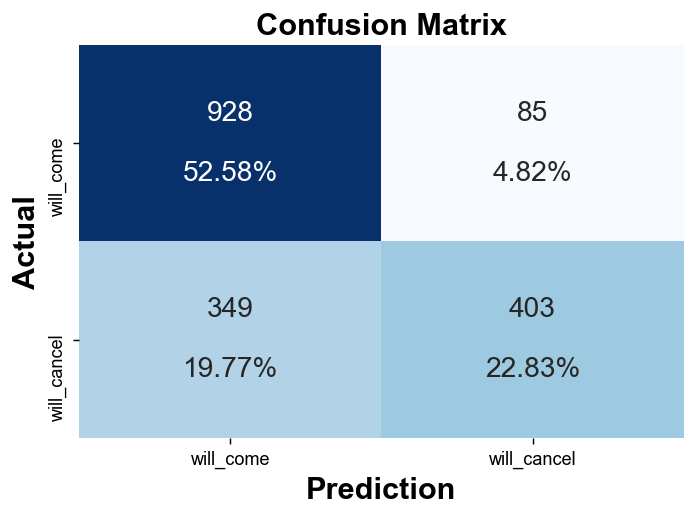

Optimal probability threshold (to maximize F-0.5): 0.622
F-0.5 Score: 0.745



In [6]:
h1_futures = predict_cancellations(h1_res, "2017-08-01", 1)

In [7]:
h1_futures.shape

(1765, 71)

In [8]:
h1_futures.will_cancel.value_counts()

False    1277
True      488
Name: will_cancel, dtype: int64

In [9]:
h1_res.IsCanceled.value_counts()

0    28938
1    11122
Name: IsCanceled, dtype: int64

In [10]:
h1_futures.sort_index()

,ResNum,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ArrivalDate,LOS,CheckoutDate,...,ResMadeDate,NumPeople,CT_is_grp,CT_is_trn,CT_is_trnP,RS_No-Show,MS_Corporate,MS_Direct,MS_Groups,MS_Offline TA/TO,MS_Online TA,DC_Direct,DC_TA/TO,DC_Undefined,MEAL_FB,MEAL_HB,MEAL_SC,MEAL_Undefined,FROM_PRT,FROM_GBR,FROM_ESP,FROM_IRL,FROM_FRA,FROM_DEU,FROM_CN,FROM_NLD,FROM_USA,FROM_ITA,FROM_other,DT_NonRefundable,DT_Refundable,AgencyBooking,CompanyListed,cxl_proba,will_cancel
12815,12815,1,240,2017,July,29,17,5,11,2,0,0,HB,CHE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NaN,0,Transient,183.05,0,0,Canceled,2016-11-23,2017-07-17,16,2017-08-02,...,2016-11-19,2,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,True,0,0,True,False,0.816976,True
12816,12816,1,236,2017,July,29,17,5,11,2,0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,242,NaN,0,Transient,182.92,0,0,Canceled,2017-05-06,2017-07-17,16,2017-08-02,...,2016-11-23,2,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,True,False,False,False,False,False,False,False,False,False,False,0,0,True,False,0.953137,True
12859,12859,1,202,2017,July,29,20,4,10,2,1,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,177,NaN,0,Transient,158.63,0,0,Canceled,2017-01-04,2017-07-20,14,2017-08-03,...,2016-12-30,3,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,0,0,True,False,0.817549,True
12874,12874,1,200,2017,July,29,21,4,11,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NaN,0,Transient,172.20,0,1,Canceled,2017-01-11,2017-07-21,15,2017-08-05,...,2017-01-02,2,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,0,0,True,False,0.712958,True
12911,12911,1,163,2017,July,29,22,4,10,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240,NaN,0,Transient,180.00,0,2,Canceled,2017-06-10,2017-07-22,14,2017-08-05,...,2017-02-09,2,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,0,0,True,False,0.908665,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,40055,0,212,2017,August,35,31,2,8,2,1,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,143,NaN,0,Transient,89.75,0,0,Check-Out,2017-09-10,2017-08-31,10,2017-09-10,...,2017-01-31,3,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,0,0,True,False,0.000720,False
40056,40056,0,169,2017,August,35,30,2,9,2,0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250,NaN,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10,2017-08-30,11,2017-09-10,...,2017-03-14,2,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,False,False,False,True,False,False,False,False,False,False,False,0,0,True,False,0.060003,False
40057,40057,0,204,2017,August,35,29,4,10,2,0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250,NaN,0,Transient,153.57,0,3,Check-Out,2017-09-12,2017-08-29,14,2017-09-12,...,2017-02-06,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,False,False,False,True,False,False,False,False,False,False,False,0,0,True,False,0.059907,False
40058,40058,0,211,2017,August,35,31,4,10,2,0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,40,NaN,0,Contract,112.80,0,1,Check-Out,2017-09-14,2017-08-31,14,2017-09-14,...,2017-02-01,2,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,False,True,False,False,False,False,False,False,False,False,False,0,0,True,False,0.000780,False


Training sample size: 76320
Testing sample Size: 3010




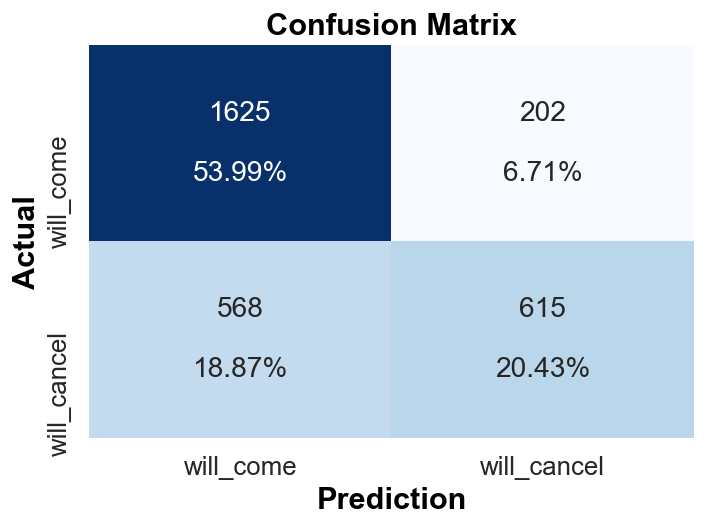

Optimal probability threshold (to maximize F-0.5): 0.652
F-0.5 Score: 0.691



In [11]:
h2_futures = predict_cancellations(h2_res, "2017-08-01", 2)

In [12]:
h2_futures.will_cancel.value_counts()

False    2193
True      817
Name: will_cancel, dtype: int64

In [13]:
from xgboost import XGBClassifier
X1_test, y_test, h1_model = model_cancellations(h1_res, "2017-08-01", 1)

Training sample size: 38295
Testing sample Size: 1765




In [14]:
X1_test_preds = h1_model.predict_proba(X1_test)

In [15]:
X1_test_preds.shape

(1765, 2)

In [16]:
X1_test.shape

(1765, 46)

In [17]:
X1_test_preds[:1]

array([[0.18302387, 0.81697613]], dtype=float32)

In [18]:
X1_test[["will_come", "will_cancel"]] = X1_test_preds

In [19]:
X1_test.head(2)

,LeadTime,LOS,StaysInWeekendNights,StaysInWeekNights,ADR,NumPeople,Adults,Children,Babies,TotalOfSpecialRequests,PreviousBookings,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,RequiredCarParkingSpaces,IsRepeatedGuest,AgencyBooking,CompanyListed,CT_is_grp,CT_is_trn,CT_is_trnP,MS_Corporate,MS_Direct,MS_Groups,MS_Offline TA/TO,MS_Online TA,DC_Direct,DC_TA/TO,DC_Undefined,FROM_PRT,FROM_GBR,FROM_ESP,FROM_IRL,FROM_FRA,FROM_DEU,FROM_CN,FROM_NLD,FROM_USA,FROM_ITA,FROM_other,DT_NonRefundable,DT_Refundable,MEAL_Undefined,MEAL_HB,MEAL_FB,will_come,will_cancel
12815,240,16,5,11,183.05,2,2,0,0,0,0,0,0,0,0,0,0,True,False,0,1,0,0,0,0,0,1,0,1,0,False,False,False,False,False,False,False,False,False,False,True,0,0,0,1,0,0.183024,0.816976
12816,236,16,5,11,182.92,2,2,0,0,0,0,0,0,0,0,0,0,True,False,0,1,0,0,0,0,0,1,0,1,0,True,False,False,False,False,False,False,False,False,False,False,0,0,0,1,0,0.046863,0.953137


In [20]:
h1_futures.shape

(1765, 71)

Training sample size: 76320
Testing sample Size: 3010




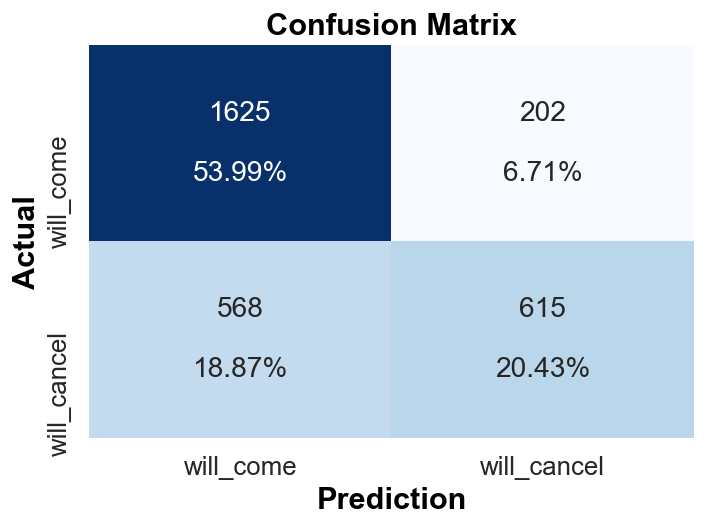

Optimal probability threshold (to maximize F-0.5): 0.652
F-0.5 Score: 0.691



In [21]:
h2_futures = predict_cancellations(h2_res, "2017-08-01", 2)


In [22]:
h2_futures.head(3)

,ResNum,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ArrivalDate,LOS,CheckoutDate,...,CT_is_grp,CT_is_trn,CT_is_trnP,RS_No-Show,MS_Complementary,MS_Corporate,MS_Direct,MS_Groups,MS_Offline TA/TO,MS_Online TA,MS_Undefined,DC_Direct,DC_GDS,DC_TA/TO,DC_Undefined,MEAL_FB,MEAL_HB,MEAL_SC,FROM_PRT,FROM_FRA,FROM_DEU,FROM_GBR,FROM_ESP,FROM_ITA,FROM_BEL,FROM_BRA,FROM_USA,FROM_NLD,FROM_other,DT_NonRefundable,DT_Refundable,AgencyBooking,CompanyListed,cxl_proba,will_cancel
32198,32198,1,192,2017,July,30,24,3,6,2,0.0,0,HB,BEL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NaN,0,Transient,166.5,0,1,Canceled,2017-04-24,2017-07-24,9,2017-08-02,...,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,False,False,False,False,False,False,True,False,False,False,False,0,0,True,False,0.298763,False
32199,32199,1,253,2017,July,30,24,3,8,2,1.0,0,BB,AUT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NaN,0,Transient,125.1,0,2,Canceled,2016-12-04,2017-07-24,11,2017-08-04,...,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,True,0,0,True,False,0.598404,False
32200,32200,1,242,2017,July,30,24,3,10,3,0.0,0,BB,BEL,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NaN,0,Transient,156.6,0,0,Canceled,2017-05-09,2017-07-24,13,2017-08-06,...,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,False,False,False,False,False,False,True,False,False,False,False,0,0,True,False,0.930386,True


In [23]:
h2_futures.will_cancel.value_counts()

False    2193
True      817
Name: will_cancel, dtype: int64

In [24]:
h1_futures.to_pickle("pickle/h1_future_res.pick")
h2_futures.to_pickle("pickle/h2_future_res.pick")

In [25]:
h1_dbd.RoomsSold.max()

187.0

In [26]:
h2_dbd.RoomsSold.max()

226.0